In [2]:
import numpy as np
import scipy 
import math
import matplotlib.pyplot as plt

In [9]:
n_1=complex(1.531, -0.002) # комплексный показатель преломления призмы (Zeonex)
eps_1=n_1**2 # диэлектрическая проницаемость призмы (Zeonex)
eps_2=1 # диэлектрическая проницаемость воздуха
#eps_4 = complex(-18.474508935284483+0.006568625288807081j) по Друде-Лоренцу
eps_4=complex(-17.3, 7.12) #InSb из telegram
#teta_0=41.0*np.pi/180 #угол падения на призму ??????
#teta_0=40.9*np.pi/180  #угол падения на призму ??????
#teta = np.pi/4-np.arcsin(np.sin(np.pi/4-teta_0)/n_1.real) #угол падения на выходе из призмы 
#teta = 42.16*np.pi/180 #файл 3 слоя
wavelength=197*10**(-6)
d_3 = 17*10**(-9) # толщина графена 




In [3]:
file = open("table.txt", "r").read()

In [4]:
file

'0\t45\t30\n100\t43\t30\n200\t43\t29\n300\t41.5\t28\n400\t41\t27\n500\t40\t24\n600\t38\t25\n700\t38\t24\n800\t38\t21\n900\t37\t23\n1000\t35\t22\n1100\t35\t21\n1200\t32\t20\n1300\t26\t19\n1400\t26\t18\n1500\t21\t18\n1600\t20\t18\n1700\t17\t19\n1800\t17\t20\n1900\t18\t20\n2000\t17\t22\n2100\t18\t21\n2200\t22\t23\n2300\t23\t26\n2400\t26\t28\n2500\t30\t29\n2600\t34\t33\n2700\t37\t36\n2800\t39\t42\n2900\t43\t44\n3000\t47\t45\n3100\t48\t47\n3200\t51\t51\n3300\t57\t55\n3400\t59\t60\n3500\t59\t60\n4000\t71\t67\n4500\t73\t74\n5000\t75\t74\n5500\t81\t78\n6000\t82\t76\n6500\t81\t77\n7000\t82\t79'

array([0.3       , 0.3       , 0.28571429, 0.27142857, 0.25714286,
       0.21428571, 0.22857143, 0.21428571, 0.17142857, 0.2       ,
       0.18571429, 0.17142857, 0.15714286, 0.14285714, 0.12857143,
       0.12857143, 0.12857143, 0.14285714, 0.15714286, 0.15714286,
       0.18571429, 0.17142857, 0.2       , 0.24285714, 0.27142857,
       0.28571429, 0.34285714, 0.38571429, 0.47142857, 0.5       ,
       0.51428571, 0.54285714, 0.6       , 0.65714286, 0.72857143,
       0.72857143, 0.82857143, 0.92857143, 0.92857143, 0.98571429,
       0.95714286, 0.97142857, 1.        ])

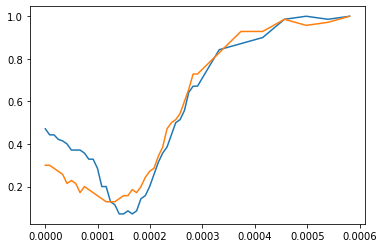

In [17]:
def string_to_np_array(input_string):
    divisions = input_string.split('\n')
    result_2d_list = np.array([list(map(float, division.split('\t'))) for division in divisions])
    return result_2d_list
Data = string_to_np_array(file)
d_2 = Data[::, 0]*83*10**(-9)  #Шкала гониометра
R_In = Data[::, 1]
noise_In = 12
R_Gr = Data[::, 2]
noise_Gr = 9
R_In = (R_In - noise_In)/(R_In[-1] - noise_In)
R_Gr = (R_Gr - noise_Gr)/(R_Gr[-1] - noise_Gr)
err_Gr = R_Gr*0.05
plt.plot(d_2, R_In)
plt.plot(d_2, R_Gr)

d_min = d_2[19] #экспериментальный минимум
R_Gr

In [6]:


""""#Параметры InSb в модели Друде Лоренца
wp=0.578*10**14 #плазменная частота (рад/с)
gp=1/5.16*10**3  #частота столкновений (рад/с)
wl=3.4*10**13 #частота Лоренца (рад/с)
gl=1/3*10**12 #Лоренцева частота столкновений (рад/с)
Al=2.02 #Амплитуда в модели Лоренца
eps0=15.86 #диэлектрическая проницаемость на бесконечности

wavelength=197*10**(-6)  #длина волны излучения
f=3*10**8/wavelength  #частота излучения
w=6.28*f  #круговая частота

#Модель Друде-Лоренца для проницаемости InSb
eps_4=eps0-wp**2/complex(w**2, gp*w)+Al*wl**2/complex(wl**2-w**2, -gl*w) 
print(eps_4)
d_2=np.linspace(0*10**(-6), 450*10**(-6), 450)  #величина зазора между призмой и InSb
d_3=4.7*10**(-6) 
teta=42.21*np.pi/180  #угол падения в призме

# f=1.5*10**12:0.01*10**12:2*10**12 
# w=6.28*f 
# 
# #Модель Друде-Лоренца для проницаемости InSb
# for j=1:1:length(w)
#     eps(j)=eps0-wp**2/(w(j)**2+i*gp*w(j))+Al*wl**2/(wl**2-w(j)**2-i*gl*w(j)) 
# end 
# plot (f, real(eps), f, imag(eps)) """"""

SyntaxError: incomplete input (355613558.py, line 27)

In [7]:
#угол не подгоняется
""""def reflect3(d):
    
    kz_1=np.sqrt(eps_1)*np.cos(teta)
    kz_2=np.sqrt(eps_2-eps_1*np.sin(teta)**2)
    kz_3=np.sqrt(eps_4-eps_1*np.sin(teta)**2)
    
#Коэффициенты отражения
    r_12=(eps_2*kz_1-eps_1*kz_2)/(eps_2*kz_1+eps_1*kz_2)
    r_23=(eps_4*kz_2-eps_2*kz_3)/(eps_4*kz_2+eps_2*kz_3)

#Коэффициенты пропускания
    t_12=2*kz_1*np.sqrt(eps_1*eps_2)/(eps_2*kz_1+eps_1*kz_2) #???
    t_23=2*kz_2*np.sqrt(eps_2*eps_4)/(eps_4*kz_2+eps_2*kz_3)
   
 #Матрица пропускания
    S1=np.array([[1/t_12, r_12/t_12], [r_12/t_12, 1/t_12]])    
    
#Расчёт R    
    R = []
    for j in range(len(d)):   #1:1:length(d_2)
        S2=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d[j])/t_23, 
         r_23*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d[j])/t_23],  
         [r_23*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d[j])/t_23, 
         np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d[j])/t_23]])
        S=S1@S2
        R += [abs(S[1][0]/S[0][0])]
    print(S)
    return(np.array(R))
"""

#угол подгоняется
def reflect3(d, angle):
    
    kz_1=np.sqrt(eps_1)*np.cos(angle)
    kz_2=np.sqrt(eps_2-eps_1*np.sin(angle)**2)
    kz_3=np.sqrt(eps_4-eps_1*np.sin(angle)**2)
    
#Коэффициенты отражения
    r_12=(eps_2*kz_1-eps_1*kz_2)/(eps_2*kz_1+eps_1*kz_2)
    r_23=(eps_4*kz_2-eps_2*kz_3)/(eps_4*kz_2+eps_2*kz_3)

#Коэффициенты пропускания
    t_12=2*kz_1*np.sqrt(eps_1*eps_2)/(eps_2*kz_1+eps_1*kz_2) #???
    t_23=2*kz_2*np.sqrt(eps_2*eps_4)/(eps_4*kz_2+eps_2*kz_3)
   
 #Матрица пропускания
    S1=np.array([[1/t_12, r_12/t_12], [r_12/t_12, 1/t_12]])    
    
#Расчёт R    
    R = []
    for j in range(len(d)):   #1:1:length(d_2)
        S2=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, r_23*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23],  [r_23*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23]])
        S=S1@S2
        R += [abs(S[1][0]/S[0][0])]
    return(np.array(R))



In [8]:
teta = scipy.optimize.curve_fit(reflect3, d_2, R_In)[0][0]
print(teta)
reflect3(d_2, teta)
#reflect4(d_2, R_Gr)
#print(scipy.optimize.curve_fit(reflect4, d_2, R_Gr))

#eps_3 = complex(*scipy.optimize.curve_fit(reflect4, d_2, R_Gr)[0])

0.7291350762966604


array([0.85150883, 0.83216697, 0.81068391, 0.78684221, 0.76041263,
       0.73115807, 0.69883977, 0.66322618, 0.6241053 , 0.58130105,
       0.53469427, 0.48424896, 0.43004509, 0.37232183, 0.31154407,
       0.24853816, 0.1848787 , 0.12440554, 0.08060122, 0.08732733,
       0.1369525 , 0.19822271, 0.26119429, 0.32283834, 0.38183369,
       0.43747883, 0.48939357, 0.53740562, 0.58149039, 0.62172997,
       0.65828136, 0.6913511 , 0.72117517, 0.74800352, 0.77208862,
       0.79367732, 0.87189665, 0.91640443, 0.94172896, 0.95618851,
       0.9644717 , 0.96922764, 0.97196203])

In [9]:
def reflect4(d_2, e3_re, e3_im):
    eps_3 = complex(e3_re, e3_im)
    kz_1=np.sqrt(eps_1)*np.cos(teta)
    kz_2=np.sqrt(eps_2-eps_1*np.sin(teta)**2)
    kz_3=np.sqrt(eps_3-eps_1*np.sin(teta)**2)
    kz_4=np.sqrt(eps_4-eps_1*np.sin(teta)**2)


#Коэффициенты отражения
    r_12=(eps_2*kz_1-eps_1*kz_2)/(eps_2*kz_1+eps_1*kz_2)
    r_23=(eps_3*kz_2-eps_2*kz_3)/(eps_3*kz_2+eps_2*kz_3)
    r_34=(eps_4*kz_3-eps_3*kz_4)/(eps_4*kz_3+eps_3*kz_4)

#Коэффициенты пропускания
    t_12=2*kz_1*np.sqrt(eps_1*eps_2)/(eps_2*kz_1+eps_1*kz_2)
    t_23=2*kz_2*np.sqrt(eps_2*eps_3)/(eps_3*kz_2+eps_2*kz_3)
    t_34=2*kz_3*np.sqrt(eps_3*eps_4)/(eps_4*kz_3+eps_3*kz_4)

#Матрица преобразования
    S1=np.array([[1/t_12, r_12/t_12], [r_12/t_12, 1/t_12]])
    S3=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34,
     r_34*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34],
     [r_34*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34, 
     np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_3*d_3)/t_34]])
    
    R = []
    for j in range(len(d_2)):   #1:1:length(d_2)
        S2=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, r_23*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23],  [r_23*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23]])
        S=S1@S2@S3
        R += [abs(S[1][0]/S[0][0])]
    
    return np.array(R)

In [10]:
R_Gr[10:30]/d_2[10:30]

array([2237.52151463, 1877.64043186, 1577.73952955, 1323.97722759,
       1106.46668306, 1032.70223752,  968.15834768, 1012.45317404,
       1051.82635303,  996.46707129, 1118.76075731,  983.5259405 ,
       1095.29025192, 1272.16942303, 1362.59323006, 1376.9363167 ,
       1588.77267311, 1721.17039587, 2028.52225227, 2077.2746157 ])

In [21]:
print(scipy.optimize.curve_fit(reflect4, d_2[10:30], R_Gr[10:30], sigma = err_Gr[10:30], bounds = ([20, 100], [400, 500]), full_output = True, method = "trf"))
eps_3 = complex(*scipy.optimize.curve_fit(reflect4, d_2[10:30], R_Gr[10:30], sigma = err_Gr[10:30], bounds = ([20, 100], [400, 500]), full_output = True, method = "trf")[0])


(array([367.37626636, 465.23085036]), array([[ 41750.66720184, -18966.19543077],
       [-18966.19543077,  57362.84263983]]), {'nfev': 11, 'fvec': array([24.77755656, 21.85016741, 18.08592376, 13.40257465,  7.87099537,
       -0.24762576, -4.69812823, -4.02962599,  0.49129431,  7.81163714,
        9.97553501, 19.35727818, 19.407651  , 16.87378923, 16.69154062,
       18.11415306, 14.25921842, 12.48298077,  8.08886618,  7.77597075])}, '`ftol` termination condition is satisfied.', 2)


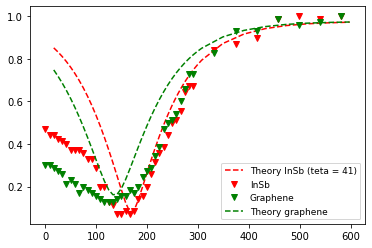

[0.000e+00 8.300e-06 1.660e-05 2.490e-05 3.320e-05 4.150e-05 4.980e-05
 5.810e-05 6.640e-05 7.470e-05 8.300e-05 9.130e-05 9.960e-05 1.079e-04
 1.162e-04 1.245e-04 1.328e-04 1.411e-04 1.494e-04 1.577e-04 1.660e-04
 1.743e-04 1.826e-04 1.909e-04 1.992e-04 2.075e-04 2.158e-04 2.241e-04
 2.324e-04 2.407e-04 2.490e-04 2.573e-04 2.656e-04 2.739e-04 2.822e-04
 2.905e-04 3.320e-04 3.735e-04 4.150e-04 4.565e-04 4.980e-04 5.395e-04
 5.810e-04]


In [12]:
#print(reflect3(d))
delta = d_2[np.argsort(R_In)[0]]-d_2[np.argsort(reflect3(d_2, teta))[0]]
plt.plot((d_2+delta)*10**6, reflect3(d_2, teta), '--r', label = 'Theory InSb (teta = 41)')
plt.plot(d_2*10**6, R_In, 'vr', label = 'InSb')
plt.plot(d_2*10**6, R_Gr, 'vg', label = 'Graphene')
plt.plot((d_2+delta)*10**6, reflect4(d_2, eps_3.real, eps_3.imag), '--g', label = 'Theory graphene')

#plt.errorbar(d_2, R_In, yerr=0.1, marker='o', linestyle='none',
#    ecolor='k', elinewidth=0.8, capsize=4, capthick=1)

plt.legend(fontsize=9)
plt.show()
print(d_2)

In [15]:
d_2_axis = (d_2+delta)*10**6
r4_axis = reflect4(d_2, eps_3.real, eps_3.imag)
r3_axis = reflect3(d_2, teta)
print(zip(d_2_axis, r4_axis, r3_axis))
export = open('export_non_orient.txt', 'w')
for line in zip(d_2_axis, R_Gr, R_In, r4_axis, r3_axis):
    export.write(str(line)+'\n')
export.close()
delta

1.6600000000000024e-05

In [379]:
reflect4(d_2, 1, 1)

array([0.85064979, 0.83120589, 0.80960862, 0.78563938, 0.75906778,
       0.72965576, 0.69716378, 0.66135997, 0.62203258, 0.57900658,
       0.5321649 , 0.48147495, 0.42702163, 0.36905094, 0.30803743,
       0.24482382, 0.18102645, 0.12066615, 0.0782531 , 0.08843798,
       0.13969973, 0.20145972, 0.26456569, 0.3261949 , 0.38509492,
       0.4405959 , 0.49233638, 0.54015688, 0.58404219, 0.62408135,
       0.66043643, 0.69331754, 0.722963  , 0.74962417, 0.7735542 ,
       0.79500013, 0.87267512, 0.91685676, 0.94199109, 0.95634045,
       0.96455984, 0.9692788 , 0.97199174])

(array([0.0010253 , 0.01462808]), array([[ 5.72429910e-05, -1.10468829e-05],
       [-1.10468829e-05,  2.27364674e-05]]))


In [64]:
R = []
for j in range(len(d_2)):   #1:1:length(d_2)
    S2=np.array([[np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, r_23*np.exp(-complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23],  [r_23*np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23, np.exp(complex(0, 1)*(2*np.pi/wavelength)*kz_2*d_2[j])/t_23]])
    S=S1@S2@S3
    R += [abs(S[1][0]/S[0][0])]


plt.plot((d_2-d_3)*10**6, R)


#Data=np.array([(d_2-d_3)*10**6, R])



NameError: name 'kz_2' is not defined

In [152]:
help("complex")

Help on class complex in module builtins:

class complex(object)
 |  complex(real=0, imag=0)
 |  
 |  Create a complex number from a real part and an optional imaginary part.
 |  
 |  This is equivalent to (real + imag*1j) where imag defaults to 0.
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __bool__(self, /)
 |      True if self else False
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Convert to a string according to format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.